In [4]:
class Tracking:
  def __init__(self,ther=0.85):
    self.final_dict={}
    self.count=0
    self.ther=ther
  def track(self,p1,frame_1 =True):
    temp=0
    if frame_1:
      self.final_dict[p1]=self.count
      self.count=self.count+1
      return self.count

    if self.final_dict:
      for pt,id in self.final_dict.items():
        iou=self.iou(p1,pt)
        if iou>=self.ther:
          del self.final_dict[pt]
          self.final_dict[p1] = id
          temp=temp+1
          return id
      if not temp:
        self.final_dict.update({p1:self.count})
        self.count=self.count+1
        return self.count



  @staticmethod
  def iou(box1, box2):
    # Extract coordinates of the two boxes
    x1_box1, y1_box1, x2_box1, y2_box1 = box1
    x1_box2, y1_box2, x2_box2, y2_box2 = box2

    # Calculate the coordinates of the intersection
    x1_inter = max(x1_box1, x1_box2)
    y1_inter = max(y1_box1, y1_box2)
    x2_inter = min(x2_box1, x2_box2)
    y2_inter = min(y2_box1, y2_box2)

    # Calculate the area of intersection
    width_inter = max(0, x2_inter - x1_inter)
    height_inter = max(0, y2_inter - y1_inter)
    area_inter = width_inter * height_inter

    # Calculate the area of each bounding box
    area_box1 = (x2_box1 - x1_box1) * (y2_box1 - y1_box1)
    area_box2 = (x2_box2 - x1_box2) * (y2_box2 - y1_box2)

    # Calculate IoU
    iou = area_inter / (area_box1 + area_box2 - area_inter)

    return iou


In [ ]:
import gdown
gdown.download(id="1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-",output = "input.mp4" )

In [ ]:
!pip install ultralytics

In [19]:
MODEL = "yolov8x.pt"

In [20]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 157MB/s]
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients


In [45]:
import cv2
cap=cv2.VideoCapture("input.mp4")
_,arr=cap.read()

In [46]:
arr.shape

(2160, 3840, 3)

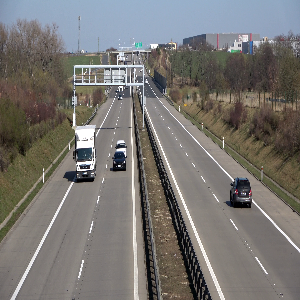

In [47]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(arr,(300,300)))

In [68]:
_,arr2=cap.read()
reslt=model.predict(arr2)


0: 384x640 4 cars, 1 truck, 2033.1ms
Speed: 2.2ms preprocess, 2033.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [60]:
reslt[0].boxes.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


tensor([[9.1916e+02, 9.0716e+02, 1.2333e+03, 1.3297e+03, 9.0739e-01, 7.0000e+00],
        [2.8859e+03, 1.2393e+03, 3.1587e+03, 1.4532e+03, 8.9618e-01, 2.0000e+00],
        [1.4302e+03, 1.1052e+03, 1.6225e+03, 1.2565e+03, 8.5503e-01, 2.0000e+00],
        [1.4688e+03, 1.0229e+03, 1.6294e+03, 1.1486e+03, 4.2543e-01, 2.0000e+00],
        [1.4699e+03, 1.0218e+03, 1.6291e+03, 1.0950e+03, 3.7474e-01, 2.0000e+00],
        [1.5057e+03, 6.7317e+02, 1.5750e+03, 7.2440e+02, 2.9494e-01, 2.0000e+00]])

In [61]:
t=Tracking()

In [74]:
arr2.shape

(2160, 3840, 3)

In [76]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for the output video (XVID is a commonly used codec)
output_video = cv2.VideoWriter('output_video.avi', fourcc, cap.get(cv2.CAP_PROP_FPS), (2160, 3840))  # Output video file name and settings

In [78]:
cap=cv2.VideoCapture("input.mp4")
cap.get(cv2.CAP_PROP_FRAME_COUNT)

538.0

In [80]:
from IPython import display
display.clear_output()

first_frame = True
for i in range(538):
  print(f" frame current ------>  {i}/{538} ")
  _,frame = cap.read()
  reslt=model.predict(frame)
  for d in reslt[0].boxes.boxes:
    x1,y1,x2,y2,cof,cls = d
    x1,y1,x2,y2,cls,cof = x1.item(),y1.item(),x2.item(),y2.item(),cls.item(),cof.item()
    p=(x1,y1,x2,y2)
    id=t.track(p,first_frame)
    label=f"#{id} {cls} {round(cof,1)}"
    cv2.rectangle(arr2,(int(x1),int(y1)),(int(x2),int(y2)),(0,0,0),5)
    cv2.putText(arr2,label,(int(x1),int(y1-10)),cv2.FONT_HERSHEY_COMPLEX,2.,(0,0,0),5,)
    output_video.write(frame)
    first_frame = False
    display.clear_output()




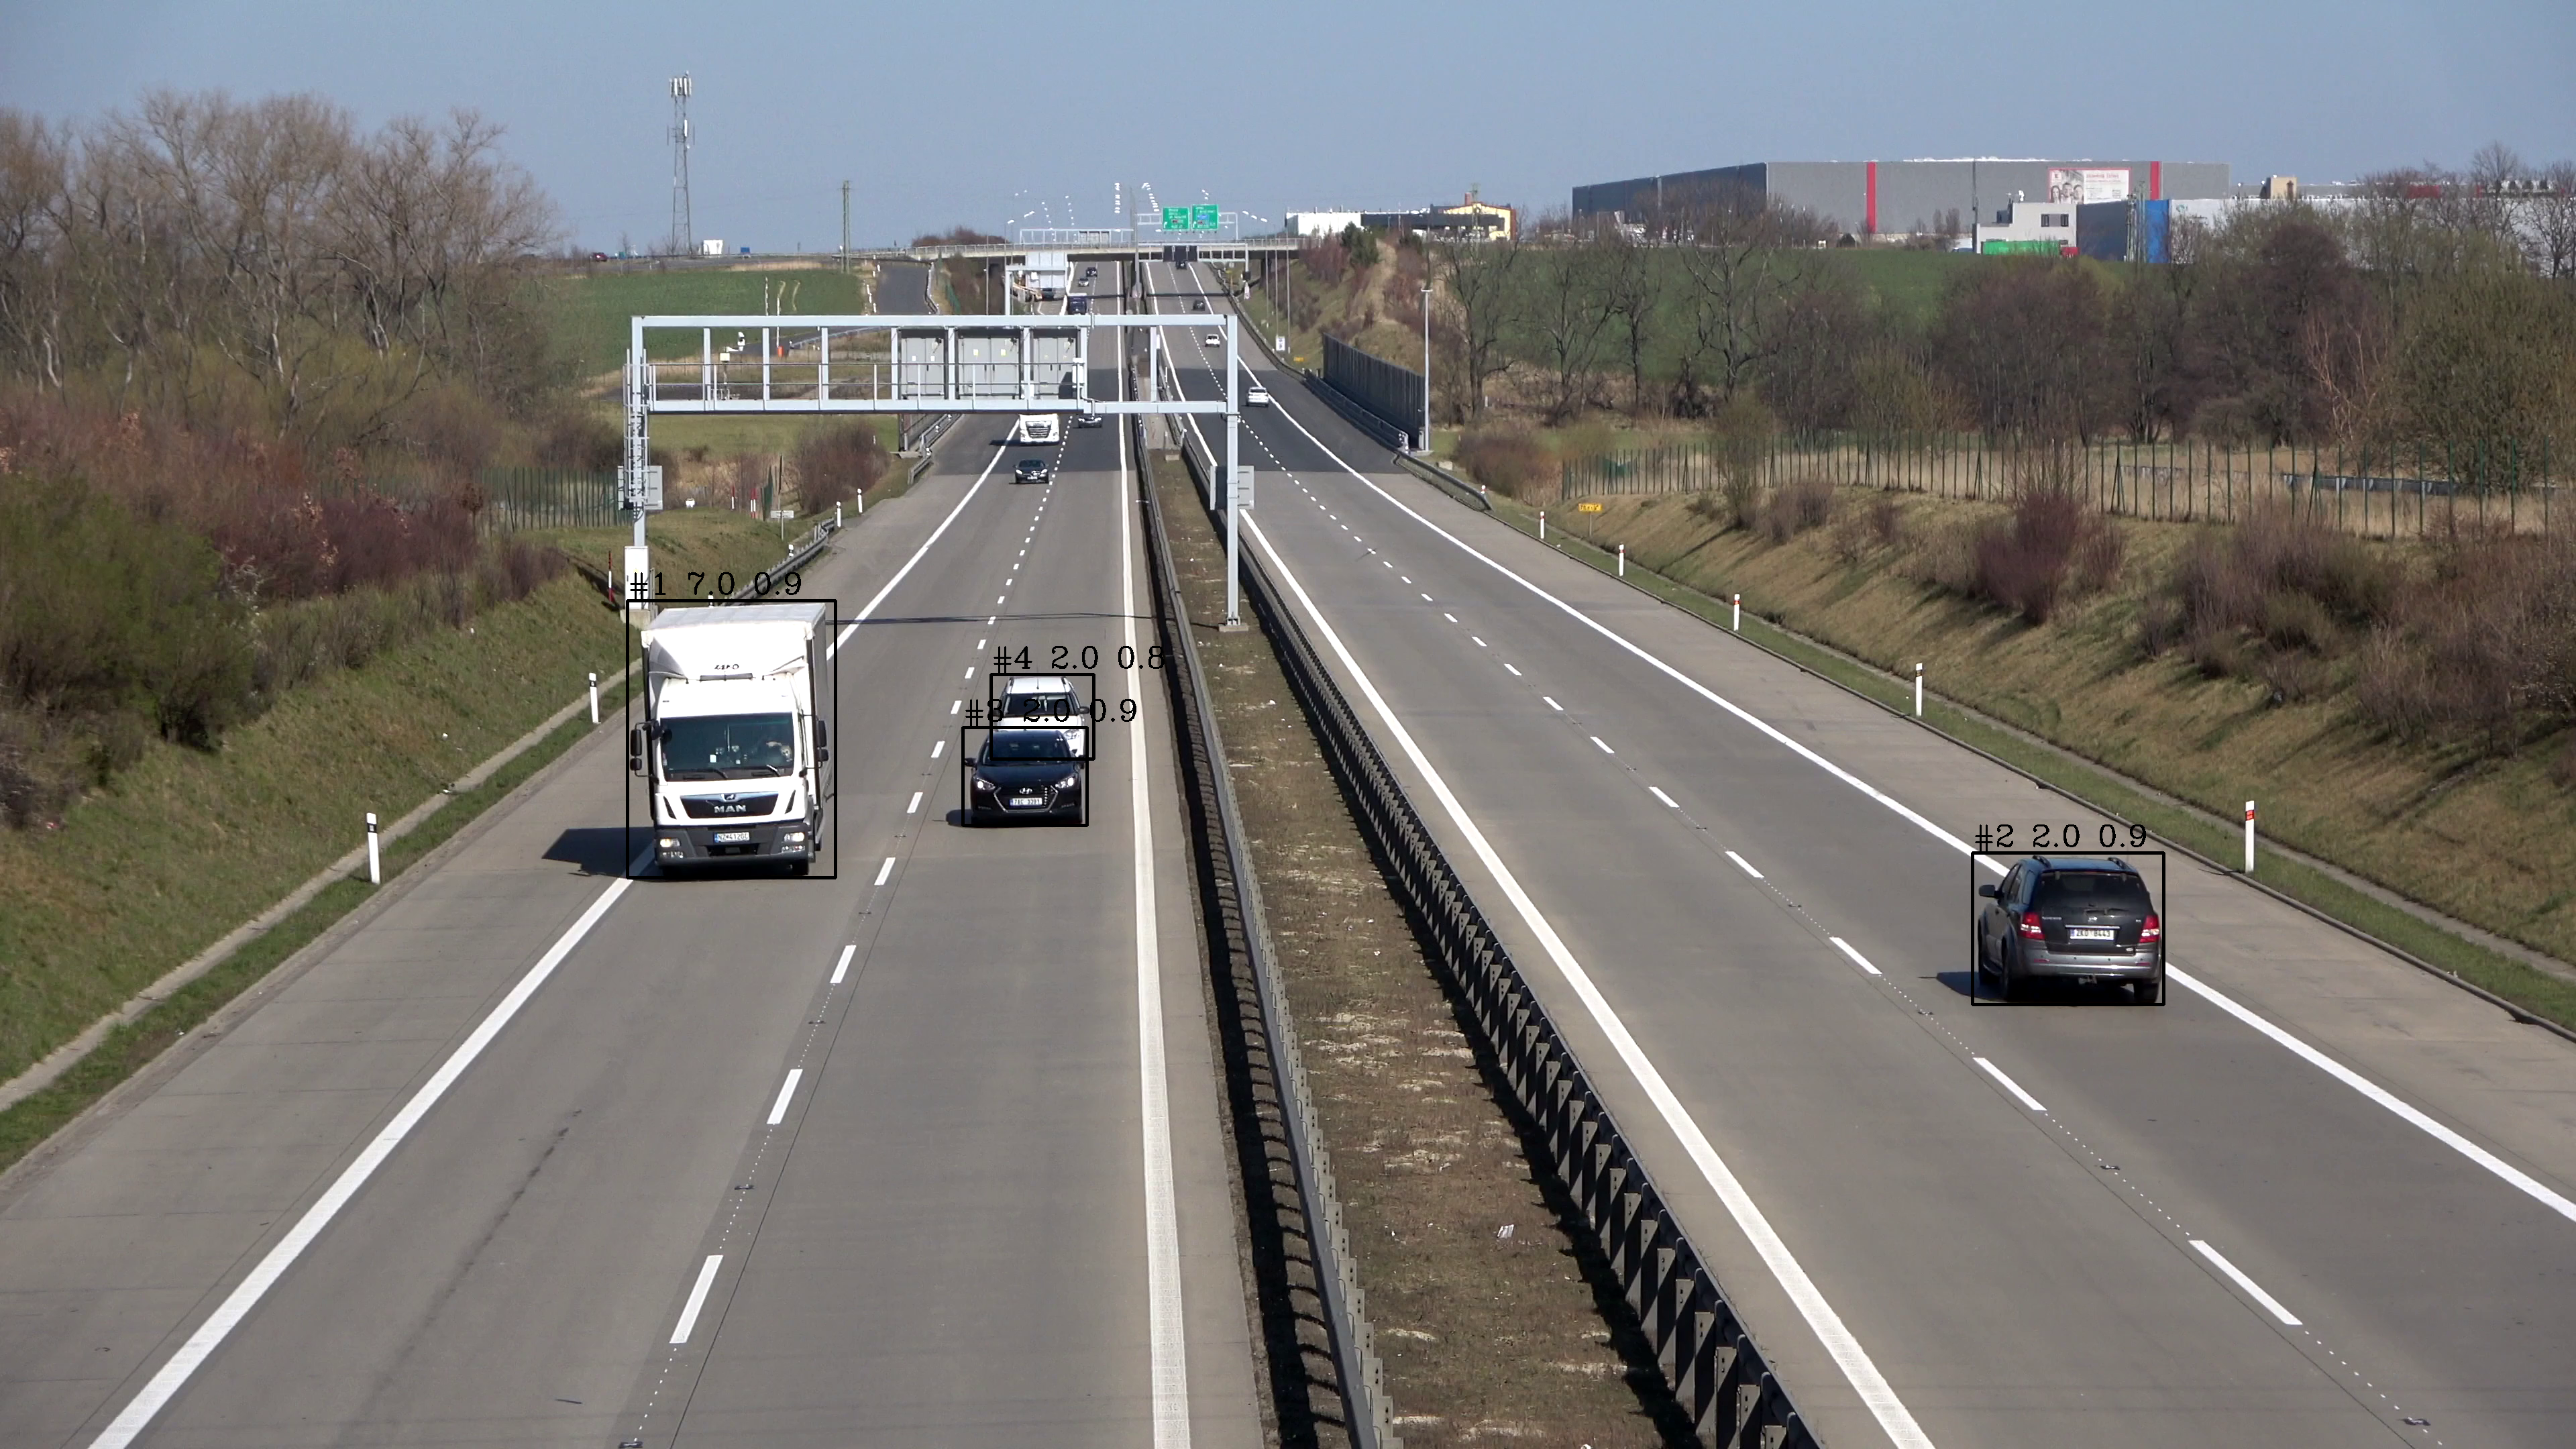

In [66]:
cv2_imshow(arr)

In [ ]:
cv2_imshow(arr2)

In [73]:
cap.get(cv2.CAP_PROP_FPS)

25.0